# Bay Area Bike Share Analysis

## Introduction


[Bay Area Bike Share](http://www.bayareabikeshare.com/) is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.

## About the Dataset

Now it's time to explore the data for yourself. The data for three years is provided in the Bay Area Bike Share's [Open Data](http://www.bayareabikeshare.com/open-data). The data comes in two parts: the first half of Year ranging from September 2013 to February 2014 (files starting `201402`) and the second half of Year ranging from March 2014 to August 2014(files starting `201408`). There are three main datafiles associated with each part: trip data showing information about each trip taken in the system (`*_trip_data.csv`), information about the stations in the system (`*_station_data.csv`), and daily weather data for each city in the system (`*_weather_data.csv`).

#### *First, load all of the packages and functions that you'll be using in your analysis by running the first code cell below. Then, run the second code cell to read a subset of the first trip data file, and write a new file containing just the subset we are initially interested in.*


In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

Starting with the *Station Data* we can analyse the data such as what are the number of docks, number of stations at each landmarks and plotting them on a pie chart to get a some initial idea as to where the capitals of Bike Share Bussiness might be large. 

In [2]:
# Read the requied file
df_201402 = pd.read_csv('201402_station_data.csv')
result = df_201402.drop(df_201402.columns[[0,2,3]], axis=1)

# city stores the unique landmark names
cities = result.landmark.unique()
print (cities)

['San Jose' 'Redwood City' 'Mountain View' 'Palo Alto' 'San Francisco']


In [3]:
# Dictionary containing cities with corresponding number of docks and stations
no_of_docks,no_of_station = {},{}
for city in cities:
    land = result[result['landmark'].str.contains(city)]
    docks = land["dockcount"].sum()
    no_of_station[city] = len(land.index)
    no_of_docks[city] = docks

In [4]:
print('No. of Docks')
print(no_of_docks)
print ('No. of station')
print(no_of_station)

No. of Docks
{'Redwood City': 115, 'Mountain View': 117, 'San Francisco': 665, 'San Jose': 249, 'Palo Alto': 75}
No. of station
{'Redwood City': 7, 'Mountain View': 7, 'San Francisco': 35, 'San Jose': 15, 'Palo Alto': 5}


In [5]:
# sort for cities
sorted_names = sorted(no_of_docks, key=lambda x: no_of_docks[x])


In [6]:
# list of labels and values of dock count for pie chart
labels_dock,values_dock = [],[]
for key, value in no_of_docks.items():
    labels_dock.append(key)
    values_dock.append(value)
print(labels_dock)
print(values_dock)

['Redwood City', 'Mountain View', 'San Francisco', 'San Jose', 'Palo Alto']
[115, 117, 665, 249, 75]


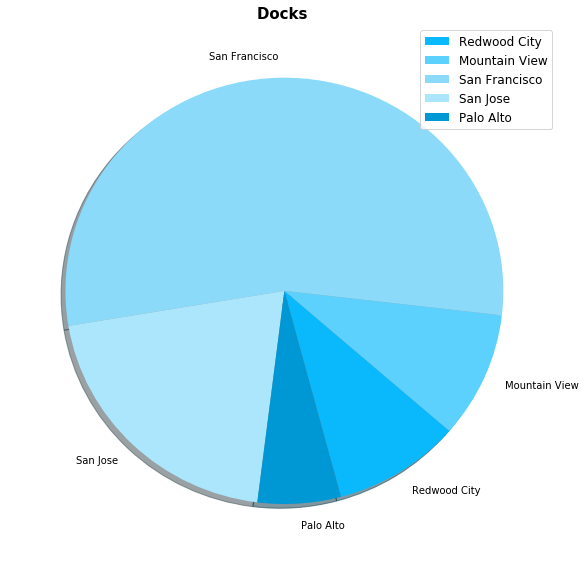

In [7]:
# Pie Chart to show the distribution of docks in different cities
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD","#0098D4"]
plt.figure(figsize=(8,8))
plt.title('Docks ', fontsize=15, fontweight='bold')
plt.pie(values_dock, labels=labels_dock, shadow = True,colors = colors, startangle = 285)
plt.legend(labels_dock, fontsize = 'large')
plt.tight_layout()
plt.show()

Here from the pie chart we can see that *San Franciso* tops the table with largest dock count of 665 followed by *Palo Alto* acquiring the lowest position with a dock count of 75. Seeing from the data, we can make an initial assumption that San Francisco provides the largest capital for Bike share in coastal Areas. 

In [8]:
# labels and values of Station data for pie chart
labels_station,values_station  = [],[]
for key, value in no_of_station.items():
    labels_station.append(key)
    values_station.append(value)
print(labels_station)
print(values_station)

['Redwood City', 'Mountain View', 'San Francisco', 'San Jose', 'Palo Alto']
[7, 7, 35, 15, 5]


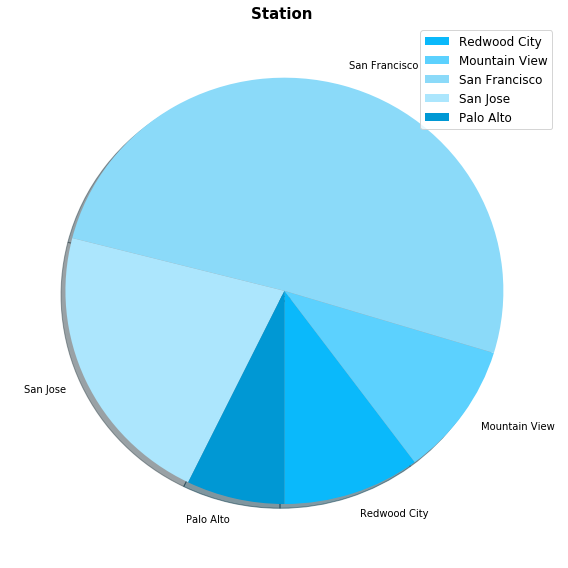

In [9]:
# Pie Chart to show the distribution of station in different landmark
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD","#0098D4"]
plt.figure(figsize=(8,8))
plt.title('Station ', fontsize=15, fontweight='bold')
patches = plt.pie(values_station,labels =labels_station, shadow = True, colors = colors, startangle= 270)
plt.legend(labels_station, fontsize = "large")
# View the plot
plt.tight_layout()
plt.show()

Here from the pie chart we can see that *San Franciso* also tops the table with largest number of stations of 665 followed by *Palo Alto* acquiring the lowest position with a dock count of 75. Seeing from the data, we can make an initial assumption that San Francisco provides the largest capital for Bike share in coastal Areas. 

### Who uses the Bay Area Bike Share?

That's a very intersting question, obviously *Riders*. But the intersting part is that the Riders are divided into two parts: 'Subscribers' and ' Costumers' depending on the type of services they require. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.


In [10]:
df_trip_201402 = pd.read_csv('201402_trip_data.csv', names=('TripID','Duration','Start_Date','Start_Station','Start_Terminal','End_Date','End_Station','End_Terminal','Bike','Subscription_Type','Zip_Code'), header = 0)
df_trip_201402['Start_Date'] = pd.to_datetime(df_trip_201402['Start_Date'])
df_trip_201402['End_Date'] = pd.to_datetime(df_trip_201402['End_Date'])
# city stores the unique landmark names
subscription = df_trip_201402.Subscription_Type.unique()

In [11]:
def days(day):
    weekdays = {"0":"Monday", "1":"Tuesday", "2": "Wednesday", "3":"Thursday", "4":"Friday", "5":"Saturday", "6":"Sunday"}
    return (weekdays[day])

In [12]:
def manipulate_list(a):
    c = a[-1]
    a.insert(0,c)
    del a[-1]
    return a

In [13]:
weekday = ["Monday", "Tuesday",  "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [14]:
# to find the number of subscribers and costumers
subscription_count = []
for i in subscription:
    sub = df_trip_201402[df_trip_201402['Subscription_Type'].str.contains(i)]
    subscription_count.append(len(sub.index))

print (subscription)
print (subscription_count)

['Subscriber' 'Customer']
[113647, 30368]


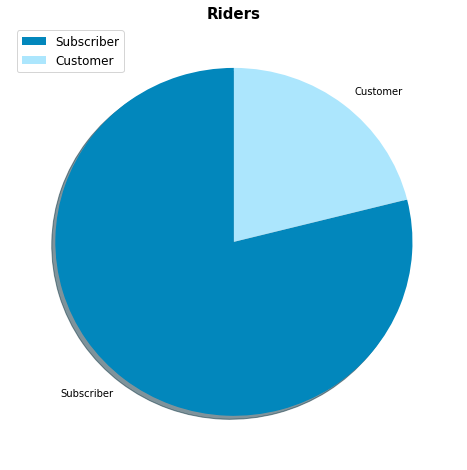

In [17]:
# Pie Chart to show the distribution Subscribers and customers
colors = ["#0287BC", "#ACE6FD"]
plt.figure(figsize=(8,8))
plt.title('Riders', fontsize=15, fontweight='bold')
patches = plt.pie(subscription_count, labels=subscription, shadow = True, colors = colors, startangle=90)
plt.legend(subscription, fontsize = 'large')
plt.show()

Wow, we seem to have large number of subscriber than customers. Lets see it for the Bar Graph too!!!

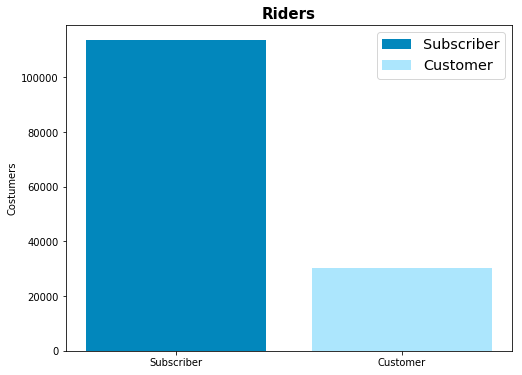

In [18]:
x_plot = np.arange(len(subscription_count))
plt.figure(figsize=(8,6))
patches = plt.bar([1,2], subscription_count, color=colors)
plt.title("Riders", fontsize = 15, fontweight = "bold")
plt.ylabel('Costumers')
plt.xticks(x_plot+1, subscription)
plt.legend(patches, subscription, fontsize = 'x-large')
plt.show()

From both the graphs we can infer that, almost 80% of riders have an annual subscription. The remaining 20% of riders were customers who purchased a 24-hour or 3-day pass.

## Why is Bay Area Bike Shared used?

We saw already that users are likely to be annual subscribers, and system use drops off on the weekends. Let's group the rides by weekday and see how subscribers' use compares to customers':

So lets compare the count of both type of riders over weekdays and hours to get the idea about the peak-day as well as the peak-hour.

In [19]:
# Extract the date
df_trip_201402["only_date"] = [d.date() for d in df_trip_201402["Start_Date"]]

# Added a new column weekdays
df_trip_201402["weekdays"] = [days(str(d.weekday())) for d in df_trip_201402["only_date"]]

In [20]:
sub = 0
cust = 0
su,cu,total = {},{},{}
su_l, cu_l, total_l = [],[],[]

for i in weekday:
    subsc = df_trip_201402[df_trip_201402['weekdays'].str.contains(i)]
    sub,cust = 0,0
    for j in range(len(subsc.index)):
        if (subsc.iloc[j]['Subscription_Type'] == "Subscriber"):
            sub += 1
        else:
            cust +=1
    su[i] = sub
    su_l.append(sub)
    cu[i] = cust
    cu_l.append(cust)
    total[i] = (sub + cust)
    total_l.append(sub + cust)
    
su_l = manipulate_list(su_l)
cu_l = manipulate_list(cu_l)
total_l = manipulate_list(total_l)
print("Number of Subscribers")
print(su)
print(su_l)
print("Number of Costumers")
print(cu)
print(cu_l)
print("Total number of riders")
print(total)
print(total_l)

Number of Subscribers
{'Friday': 19763, 'Wednesday': 20248, 'Monday': 19705, 'Saturday': 6073, 'Tuesday': 21461, 'Sunday': 5003, 'Thursday': 21394}
[5003, 19705, 21461, 20248, 21394, 19763, 6073]
Number of Costumers
{'Friday': 4520, 'Wednesday': 3403, 'Monday': 3433, 'Saturday': 6340, 'Tuesday': 3217, 'Sunday': 5584, 'Thursday': 3871}
[5584, 3433, 3217, 3403, 3871, 4520, 6340]
Total number of riders
{'Friday': 24283, 'Wednesday': 23651, 'Monday': 23138, 'Saturday': 12413, 'Tuesday': 24678, 'Sunday': 10587, 'Thursday': 25265}
[10587, 23138, 24678, 23651, 25265, 24283, 12413]


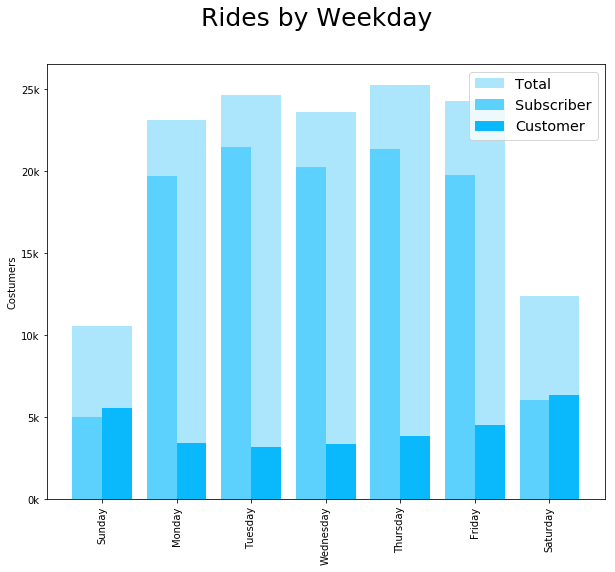

In [21]:
weekday = ["Sunday","Monday", "Tuesday",  "Wednesday", "Thursday", "Friday", "Saturday"]
x_plot = np.arange(len(weekday))
bar_width = 0.4
plt.figure(figsize=(10,8))
p_map1 = plt.bar(x_plot+1, total_l, (bar_width*2), color="#ACE6FD", label="total")
p_map2 = plt.bar(x_plot+0.8, su_l, bar_width, label='Subscriber', color="#5CD1FE")
p_map3 = plt.bar(x_plot+1.2, cu_l, bar_width, color="#0AB9FB")
plt.suptitle("Rides by Weekday", fontsize = 25)
plt.ylabel('Costumers')
plt.xticks(x_plot+1, weekday, rotation='vertical')
plt.yticks([0,5000,10000,15000,20000,25000],['0k','5k', '10k','15k','20k', '25k'])
plt.legend([p_map1,p_map2,p_map3],['Total','Subscriber','Customer'],fontsize = 'x-large')
plt.show()

Weekday riders are overwhelmingly subscribers, and ridership among subscribers falls on weekends so that rides by customers just manage to outnumber them.

In [22]:
# Extract the date
df_trip_201402["only_time"] = [str(d.time()) for d in df_trip_201402["Start_Date"]]
df_trip_201402["only_hour"] = 0
only_hour = []
for j in range(len(df_trip_201402.index)):
    a = (df_trip_201402.iloc[j]['only_time'])
    if (a[0] == '0'):
        a = a[1]
    else :
        a = a[:2]
    only_hour.append(int(a))
    
df_trip_201402["only_hour"] = only_hour

In [23]:
hour = []
for i in range(1,24):
    hour.append(i)
print(hour)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [24]:
sub,cust = 0,0
su,cu,total = {},{},{}
su_l,cu_l,total_l = [],[],[]
df_bike = df_trip_201402[["only_hour", "Bike", "Subscription_Type"]]
bike_count_l = []
for j in hour:
    b = df_bike[df_bike["only_hour"] == j]
    sub,cust = 0,0
    for i in range(len(b.index)):
        if (b.iloc[i]['Subscription_Type'] == "Subscriber"):
            sub += 1
        else:
            cust +=1
    su[j] = sub
    su_l.append(sub)
    cu[j] = cust
    cu_l.append(cust)
    total[j] = (sub + cust)
    total_l.append(sub + cust)

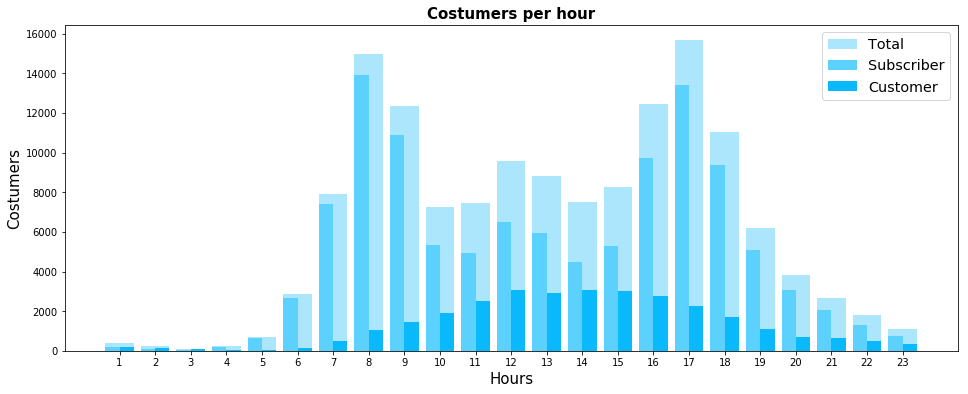

In [25]:
x_plot = np.arange(len(hour))
plt.figure(figsize=(16,6))
bar_width = 0.4
patch1 = plt.bar(x_plot+1, total_l, (bar_width*2), color="#ACE6FD")
patch2 = plt.bar(x_plot+0.8, su_l, bar_width, color="#5CD1FE")
patch3 = plt.bar(x_plot+1.2, cu_l, bar_width, color="#0AB9FB")
plt.title("Costumers per hour", fontsize = 15, fontweight = "bold")
plt.ylabel('Costumers', fontsize = 15)
plt.xlabel('Hours', fontsize = 15)
plt.xticks(x_plot+1, hour)
plt.legend([patch1,patch2,patch3],['Total','Subscriber','Customer'], fontsize = 'x-large')
plt.show()

Among subscribers we see spikes in use at 8am and 5pm with another small bump at 12 noon. These users must be riding a bike to get to work, to go to lunch, and to head home.

Customers hourly usage seems to fall along a bell-shaped distribution peaking at two in the afternoon. There doesn't seem to be a lunchtime rise among customer use. These users must be riding around throughout the daytime at their leisure.

From these usage behaviors, it would be fair to characterize the two groups of subscribers and customers as commuters and tourists, respectively.

## For how much time is the Bay Area Bike Shared?

The Bike Share system is intended to be used for short rides: trips under a half hour do not incur any additional charges. Do riders use the system in the intended way?

In [26]:
df_trip_201402['Time_diff'] = 0
time_diff = df_trip_201402['End_Date'] - df_trip_201402['Start_Date']
time_diff = pd.to_datetime(time_diff)

total_time = []
for i in time_diff:
    h = i.hour
    m = i.minute
    tt = h*60 + m
    total_time.append(tt)

df_trip_201402['Time_diff'] = total_time

In [27]:
time_set = set(total_time)
time_set = list(time_set)
time_s = []
for y in time_set:
    if (y<=60):
        time_s.append(y)

In [28]:
sub = 0
cust = 0
su_l, cu_l, total_l = [],[],[]
for t in time_s:
    df = df_trip_201402[df_trip_201402['Time_diff'] == t]
    sub,cust = 0,0
    for j in range(len(df.index)):
        if (df.iloc[j]['Subscription_Type'] == "Subscriber"):
            sub += 1
        else:
            cust +=1
    su_l.append(sub)
    cu_l.append(cust)
    total_l.append(sub + cust)

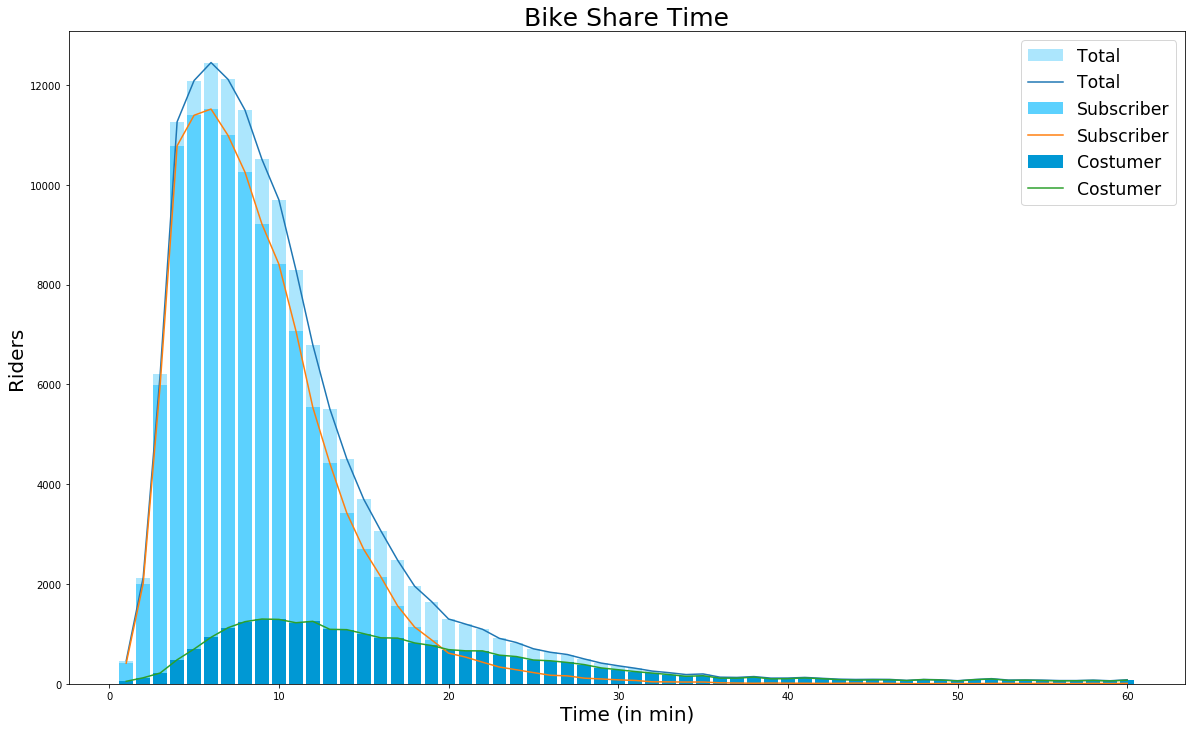

In [29]:
plt.figure(figsize=(20,12))
plt.title("Bike Share Time", fontsize = 25)
plt.xlabel("Time (in min)", fontsize = 20)
plt.ylabel("Riders", fontsize = 20)
p11, = plt.plot(time_s,total_l)
p22, = plt.plot(time_s,su_l)
p33, = plt.plot(time_s,cu_l)
p1 = plt.bar(time_s,total_l, color = "#ACE6FD")
p2 = plt.bar(time_s,su_l, color = "#5CD1FE")
p3 = plt.bar(time_s,cu_l, color = "#0098D4")
plt.legend([p1,p11,p2,p22,p3,p33],["Total","Total","Subscriber","Subscriber","Costumer","Costumer"],fontsize = 'xx-large')
plt.show()

Yes they do. The chart here shows that the most common ride length is 5 to 10 minutes. Subscribers are clearly savvy to the price structuring. Very few rides longer than a half hour are taken by subscribers. For the most part, customers are savvy as well. Their trips last a little longer on average, but mostly less than 30 minutes. There's a bump in rides that last longer than an hour.

## Which station get how many riders?

In [30]:
stations = df_trip_201402.Start_Station.unique()

In [31]:
station_data = {}
for station in stations:
    st = df_trip_201402[df_trip_201402['Start_Station'].str.contains(station)]
    station_data[station] = len(st.index)
    
station_list, station_count = [],[]
for key,value in station_data.items():
    station_list.append(key)
    station_count.append(value)

/home/zectrosan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


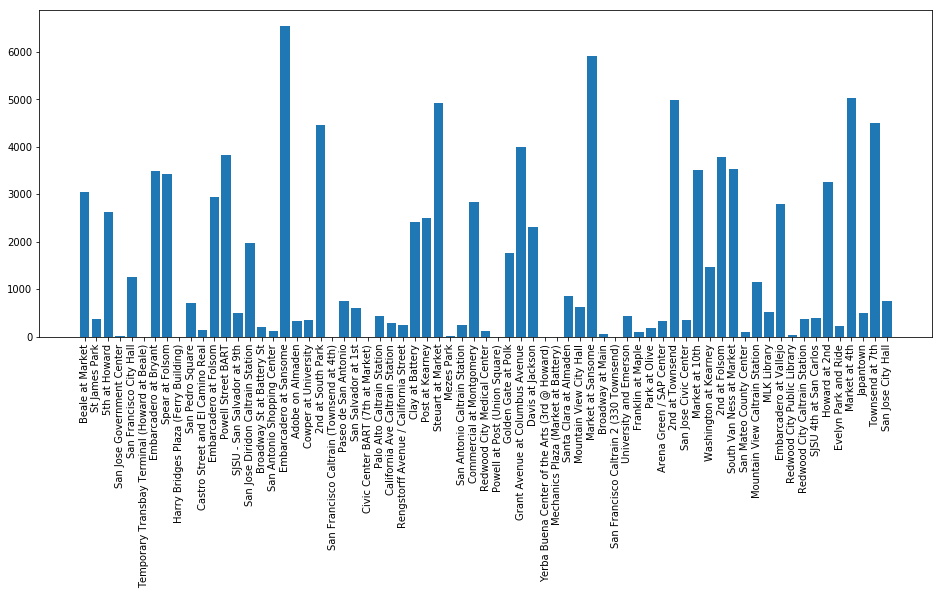

In [32]:
x_plot = np.arange(len(station_list))
x_plot
station_count
plt.figure(figsize=(16,6))
p = plt.bar(x_plot+1, station_count)
plt.xticks(x_plot+1, station_list, rotation = 'vertical')
plt.show()